### Vizualizando dados com GEOPANDAS

In [25]:
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
import pysal as ps
import matplotlib.pyplot as plt
%matplotlib inline

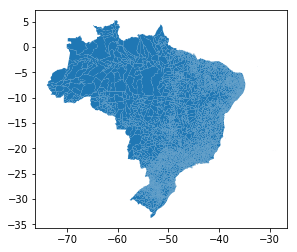

In [113]:
municipios_br = gpd.read_file('data\malhas_digitais\BRMUE250GC_SIR.shp')
municipios_br.plot()

In [11]:
municipios_br.head()

,NM_MUNICIP,CD_GEOCMU,geometry
0,CAIUÃ,3509106,POLYGON ((-51.86001052999998 -21.5807199056459...
1,CASTILHO,3511003,POLYGON ((-51.41936432700003 -20.6810765586240...
2,DRACENA,3514403,POLYGON ((-51.48515406800003 -21.4276462056422...
3,ESTRELA DO NORTE,3515301,POLYGON ((-51.57097467399996 -22.3988718766653...
4,EUCLIDES DA CUNHA PAULISTA,3515350,POLYGON ((-52.44569233499996 -22.6082794076701...


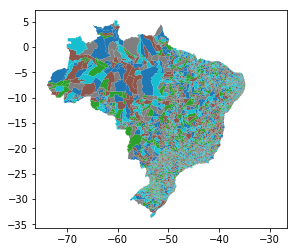

In [16]:
municipios_br.plot(column='NM_MUNICIP', scheme='QUANTILES')

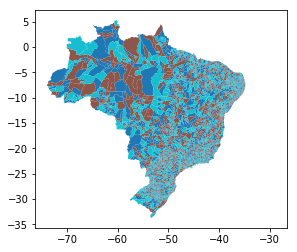

In [18]:
municipios_br.plot(column='NM_MUNICIP', scheme='QUANTILES', k=3)

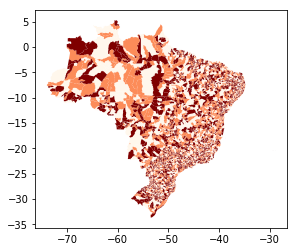

In [19]:
municipios_br.plot(column='NM_MUNICIP', scheme='QUANTILES', k=3, cmap='OrRd')

### Vizualizando dados espaciais com Folium

In [121]:
import folium as fm
import pandas as pd

In [117]:
votos = pd.read_csv('data\municipios_turno_2.csv')
municipios_br = gpd.read_file('data\malhas_digitais\municipios.json')
votos['CD_GEOCMU'] = votos['CD_GEOCMU'].astype(str) 
municipios_br = municipios_br.merge(votos, on='CD_GEOCMU', how='left')
municipios_br['ganhador'] = [17 if B > H else 13 for B,H in zip(municipios_br['17'],municipios_br['13'])]

In [118]:
import branca.colormap as cm

index = [13,15,17]
step = cm.StepColormap(
    ['#b2182c','#2166ac'],
    vmin=13, vmax=17,
    index=index,
    caption='Eleições 2018'
)

step


In [120]:
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=5, tiles='cartodbpositron')

folium.GeoJson(data=municipios_br,
               name='Br Cities',
               tooltip=folium.GeoJsonTooltip(fields=['NM_MUNICIPIO', 'UF', '13', '17'],
                                             aliases=['<div style="background-color: lightyellow; color: black; padding: 3px; border: 2px solid black; border-radius: 3px;">'+item+'</div>' for item in ['City','State','HADDAD', 'BOLSONARO']],
                                             labels=True,
                                             sticky=True),
               style_function=lambda city: {'fillColor': step(city['properties']['ganhador']),
                                           'color': 'black',
                                           'fillOpacity': 0.7,
                                           'lineOpacity':0.1,
                                           'weight': 0.3
                                          }
              ).add_to(m)
m.save('mapa_eleicoes_2018.html')
